In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from shared.utility import get_model_file
from shared.metrics import f1_score

## Setup some constants

In [2]:
PROJECT_NAME="dogs_cats"
INPUT_DIR="data/{}".format(PROJECT_NAME)
OUTPUT_DIR="output/{}".format(PROJECT_NAME)
TEST_DIR = os.path.join(INPUT_DIR, "test")

## Check available models

In [10]:
!ls output/dogs_cats/*ex05_02*

output/dogs_cats/model-ex05_02-2019.01.27.14.36.31.h5


## Load Model

In [3]:
MODEL_TS = "2019.01.27.14.36.31" #timestamp from cell above of model we want
MODEL_FILE = get_model_file(OUTPUT_DIR, fname="ex05_02", ts=MODEL_TS)
model = load_model(MODEL_FILE, custom_objects={'f1_score': f1_score})
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## Pick and image and plot it

(1, 150, 150, 3)


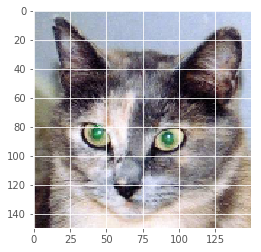

In [4]:
IMG_PATH = os.path.join(TEST_DIR, 'cats', 'cat.1700.jpg')

img = image.load_img(IMG_PATH, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)
plt.imshow(img_tensor[0])
plt.show()

## Capture activations

In [6]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

## Run capture on our test image

In [7]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


## Plot activation channel 4

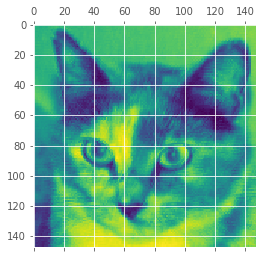

In [8]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

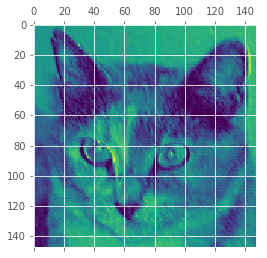

In [9]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')